In [1]:
import numpy as np
import re, copy, sys

import rainbow as rb

import chromatics

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

[0.12138175 0.117148   0.35171148 0.40975877]
0.5088746946978754
0.4911253053021247

0.4618847276462598
0.5381152723537401

3.19234921531031


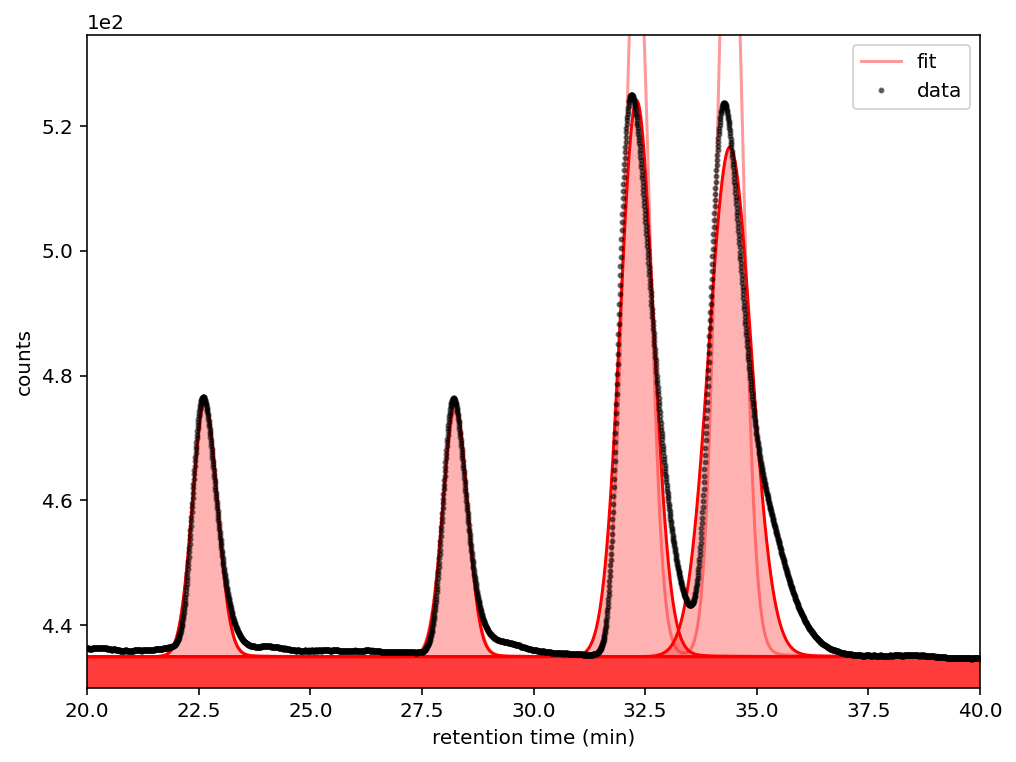

PEAK OBJECT ATTRIBUTES:
	peak 0:
	model:	<lmfit.Model: Model(frankenstein, prefix='p0_')>
	params:
		amplitude:	0.05347
		center:	22.63698
		sigma:	0.27891
		gamma:	0.01000
	peak 1:
	model:	<lmfit.Model: Model(frankenstein, prefix='p1_')>
	params:
		amplitude:	0.05158
		center:	28.24288
		sigma:	0.27025
		gamma:	0.01000
	peak 2:
	model:	<lmfit.Model: Model(frankenstein, prefix='p2_')>
	params:
		amplitude:	0.15548
		center:	32.31006
		sigma:	0.37099
		gamma:	0.01000
	peak 3:
	model:	<lmfit.Model: Model(frankenstein, prefix='p3_')>
	params:
		amplitude:	0.18156
		center:	34.39900
		sigma:	0.47261
		gamma:	0.01000


In [4]:
## load datafile using rainbow
datadir = rb.read("data.D")
datafile = datadir.get_file("dad1.uv")

## get correct wavelength
wavelength = 210
assert wavelength in datafile.ylabels

## create chromatogram object
## model defaults to "frankenstein" but can be changed to other options:
##     chromatics.GaussianPeak
##     chromatics.ExponentialGaussianPeak
##     chromatics.SkewedGaussianPeak
c = chromatics.Chromatogram(
    datafile.xlabels,
    datafile.data.T,
    Y_labels=datafile.ylabels,
    peaks=4,
#    model=chromatics.SkewedGaussianPeak
)

## fit baseline in a flat region
c.fit_baseline(
    label=wavelength,
    X_min=38,
    X_max=40
)

## fit peaks, providing initial guess for centers
## same_sigma_gamma restricts the functional form of the peaks to be the same.
## for two peaks, this is usually good. for four peaks, we have diastereomers with diff. shape, so it's bad.
c.fit_peaks(
    label=wavelength,
    times=[22.5, 28, 32, 34.5],
    same_sigma_gamma=False,
)

## refit the peaks to improve fit. 5 tries is usually good.
c.refit(
    label=wavelength,
    num=5,
    same_sigma_gamma=False,
)

## print results, broken down by enantiomer pair
areas = c.areas()
print(areas)

## first pair, e.r.
print(areas[0]/(areas[0]+areas[1]))
print(areas[1]/(areas[0]+areas[1]))
print()

## second pair, e.r.
print(areas[2]/(areas[2]+areas[3]))
print(areas[3]/(areas[2]+areas[3]))
print()

## d.r.
print((areas[2]+areas[3])/(areas[0]+areas[1]))


## plot the chromatogram
fig = plt.figure(figsize=(8,6))
ax = fig.gca()

c.plot(
    ax, 
    label=wavelength, 
    legend=True,
    color="red"
)

ax.set_xlim(left=20,right=40)
ax.set_ylim(bottom=430)
plt.show()    


## optional - expose internal state of the objects. can see what the center actually is!
print("PEAK OBJECT ATTRIBUTES:")
for i, p in enumerate(c.peaks):
    print(f"\tpeak {i}:")
    print(f"\tmodel:\t{p.model}")
    print(f"\tparams:")
    for k, v in p.params.items():
        print(f"\t\t{k}:\t{v:.5f}")